# Exploratory Data Analysis (EDA) on Iris Dataset

## Importing libraries

In [51]:
import os
import pandas as pd
import numpy as np

## Importing dataset

In [52]:
data_csv = pd.read_csv('Iris_data_sample.csv',index_col=0)

In [53]:
data_csv.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,NaN,1.4,0.2,NaN
3,4.7,3.2,1.3,0.2,Iris-setosa
4,??,3.1,1.5,0.2,Iris-setosa
5,5,3.6,###,0.2,Iris-setosa


## Replacing '??' and '###' as missing values

In [54]:
data_csv = pd.read_csv('Iris_data_sample.csv',index_col=0,na_values = ['??','###'])

In [55]:
data_csv.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,NaN,1.4,0.2,NaN
3,4.7,3.2,1.3,0.2,Iris-setosa
4,NaN,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,NaN,0.2,Iris-setosa


## Creating deep copy of the original data

In [56]:
data_csv1 = data_csv.copy(deep=True)

In [57]:
data_csv1.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150],
      dtype='int64', length=150)

In [58]:
data_csv1.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [59]:
data_csv1.size

750

In [60]:
data_csv1.shape

(150, 5)

In [61]:
data_csv1.memory_usage()

Index            1200
SepalLengthCm    1200
SepalWidthCm     1200
PetalLengthCm    1200
PetalWidthCm     1200
Species          1200
dtype: int64

In [62]:
data_csv1.ndim

2

In [63]:
data_csv1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  149 non-null    float64
 1   SepalWidthCm   149 non-null    float64
 2   PetalLengthCm  148 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [64]:
data_csv1.iat[4,4]

'Iris-setosa'

In [65]:
data_csv1.at[112,"Species"]

'Iris-virginica'

In [66]:
data_csv1.loc[:,"Species"]

1         Iris-setosa
2                 NaN
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: Species, Length: 150, dtype: object

In [67]:
data_csv1.select_dtypes(exclude=[object])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
1,5.1,3.5,1.4,0.2
2,4.9,NaN,1.4,0.2
3,4.7,3.2,1.3,0.2
4,NaN,3.1,1.5,0.2
5,5.0,3.6,NaN,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [68]:
print(np.unique(data_csv1["PetalLengthCm"]))

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.9 3.  3.3 3.5 3.6 3.7 3.8 3.9 4.  4.1
 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
 6.  6.1 6.3 6.4 6.6 6.7 6.9 nan]


In [69]:
data_csv1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,149.000000,149.000000,148.000000,150.000000
mean,5.851678,3.054362,3.788514,1.198667
std,0.824507,0.435034,1.757260,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Identifing missing values and Approches to fill the missing values

### Numerical varibles

In [76]:
data_csv1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 11.1+ KB


### Categorical type

In [78]:
data_csv1['Species'].fillna(data_csv1['Species'].value_counts().index[0], inplace=True)

In [79]:
data_csv1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 11.1+ KB


In [80]:
data_csv1.head(8)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.100000,3.500000,1.400000,0.2,Iris-setosa
2,4.900000,3.054362,1.400000,0.2,Iris-versicolor
3,4.700000,3.200000,1.300000,0.2,Iris-setosa
4,5.851678,3.100000,1.500000,0.2,Iris-setosa
5,5.000000,3.600000,3.788514,0.2,Iris-setosa
6,5.400000,3.900000,3.788514,0.4,Iris-setosa
7,4.600000,3.400000,1.400000,0.3,Iris-setosa
8,5.000000,3.400000,1.500000,0.2,Iris-setosa


## Checking Missing Values

In [81]:
data_csv1.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Checking Duplicates

In [85]:
data_csv1['Species'].value_counts()

Species
Iris-versicolor    51
Iris-virginica     50
Iris-setosa        49
Name: count, dtype: int64

# Data Visualization

## Importing packages

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

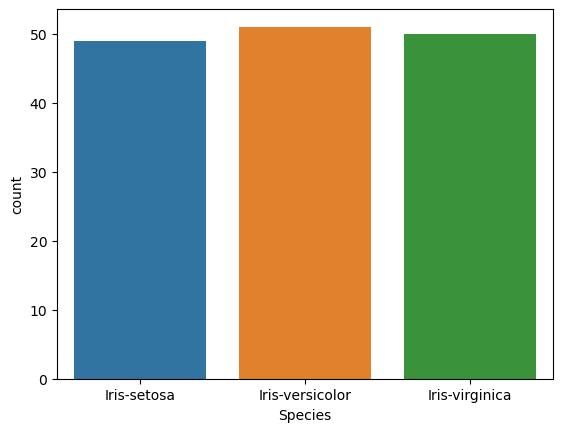

In [87]:
sns.countplot(x='Species' , data=data_csv1, )
plt.show()

## Relation between variables

### SepalLengthCm vs SepalWidthCm

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

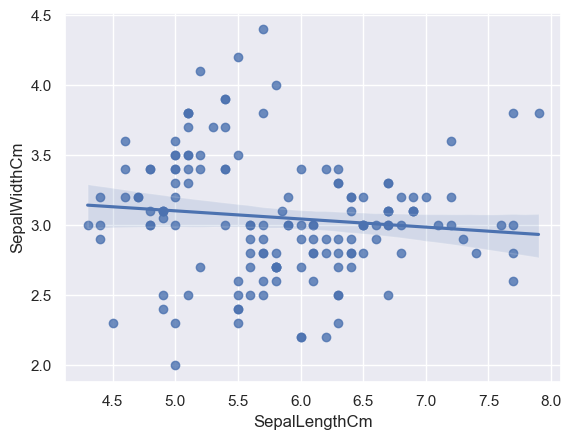

In [90]:
sns.set(style='darkgrid')
sns.regplot(x=data_csv1['SepalLengthCm'], y=data_csv1['SepalWidthCm'])

### PetalLengthCm vs PetalWidthCm

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

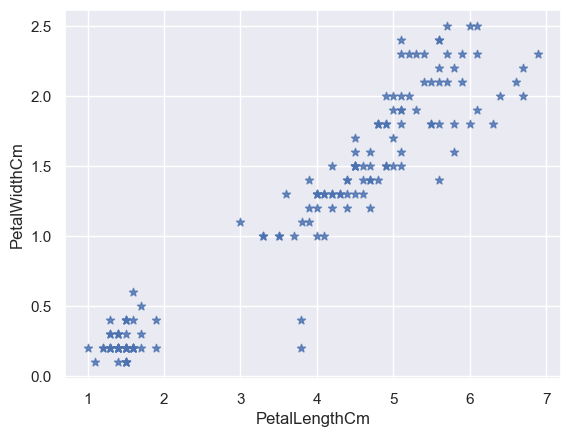

In [92]:
sns.regplot(x=data_csv1['PetalLengthCm'], y=data_csv1['PetalWidthCm'],marker='*', fit_reg=False)

### Scatter plot of SepalLengthCM vs SepalWidthCM by Species using hue

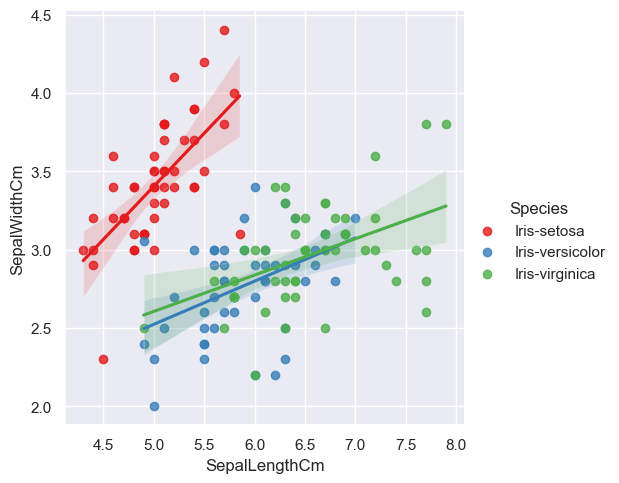

In [93]:
sns.lmplot(x='SepalLengthCm' , y='SepalWidthCm' , data=data_csv1, hue='Species', legend=True,palette='Set1')

### Scatter plot of PetalLengthCM vs PetalWidthCM by Species using hue

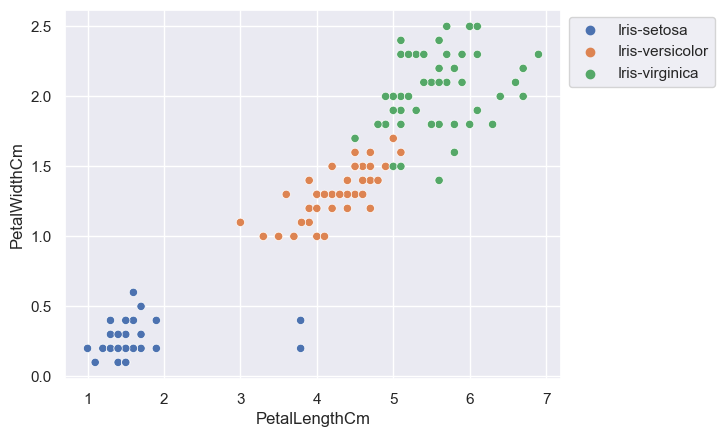

In [95]:
sns.scatterplot(x='PetalLengthCm' , y='PetalWidthCm' ,
                hue='Species' , data=data_csv1)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

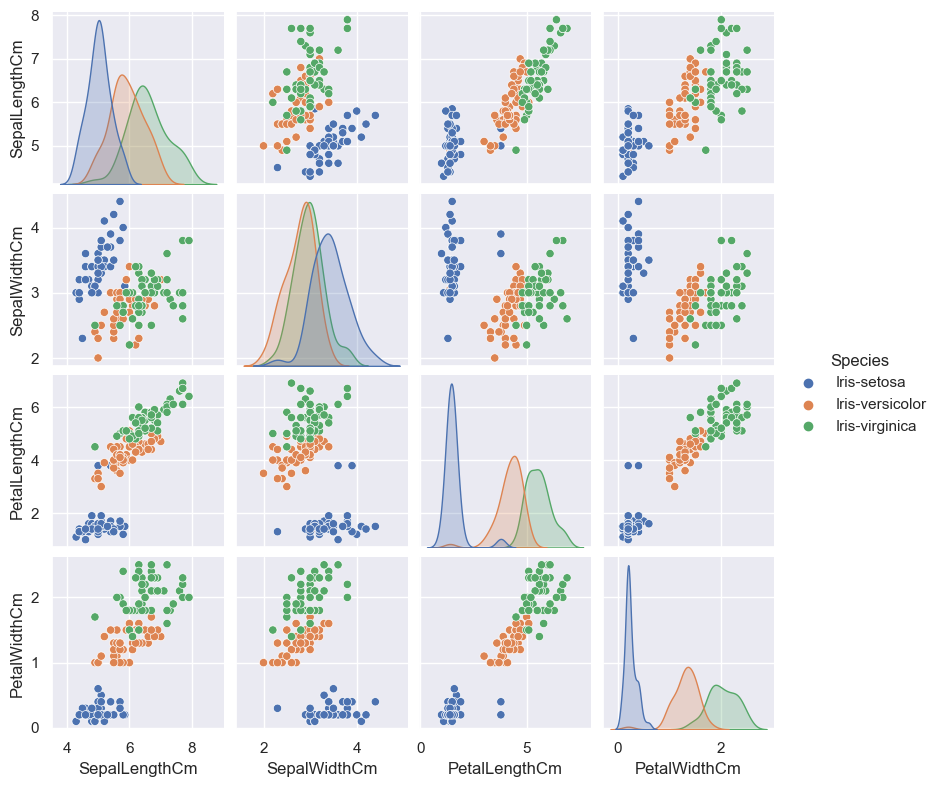

In [107]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.pairplot(data_csv1, hue='Species', height=2)
plt.show()

## Histograms

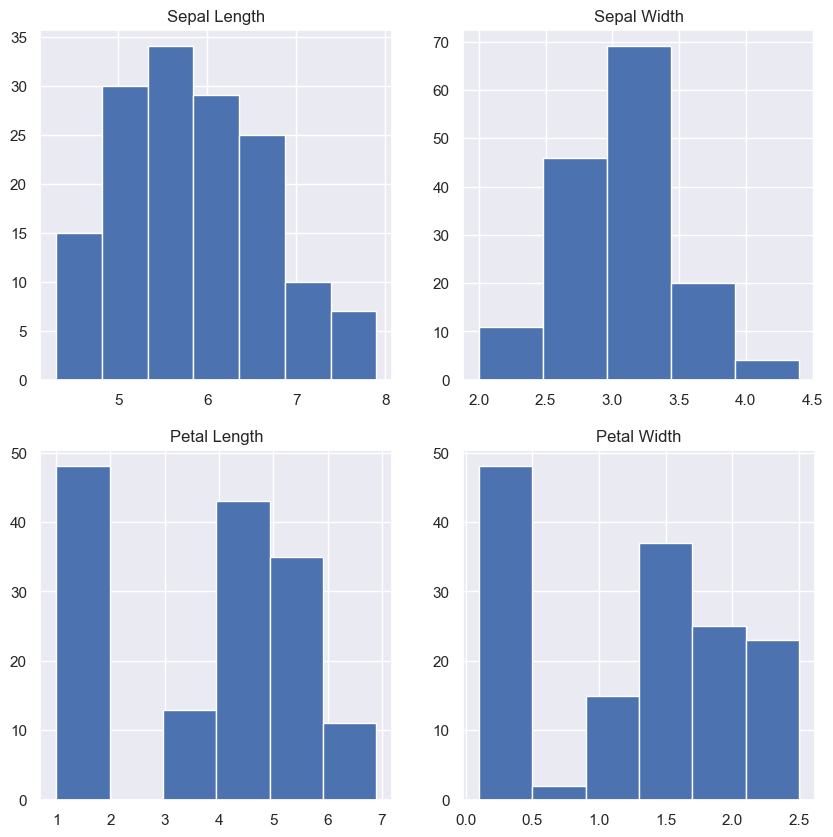

In [109]:
fig, axes = plt.subplots(2, 2, figsize=(10,10)) 
  
axes[0,0].set_title("Sepal Length") 
axes[0,0].hist(data_csv1['SepalLengthCm'], bins=7) 
  
axes[0,1].set_title("Sepal Width") 
axes[0,1].hist(data_csv1['SepalWidthCm'], bins=5); 
  
axes[1,0].set_title("Petal Length") 
axes[1,0].hist(data_csv1['PetalLengthCm'], bins=6); 
  
axes[1,1].set_title("Petal Width") 
axes[1,1].hist(data_csv1['PetalWidthCm'], bins=6);

## Histograms with Distplot plot

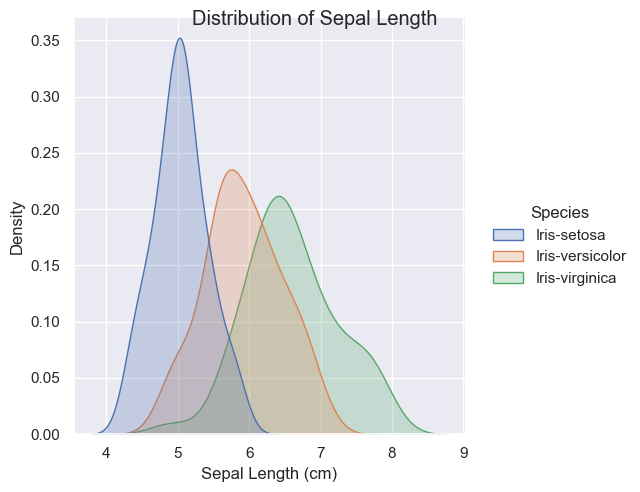

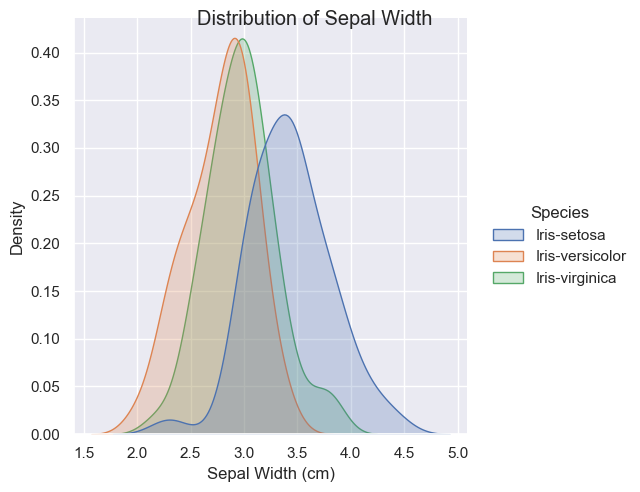

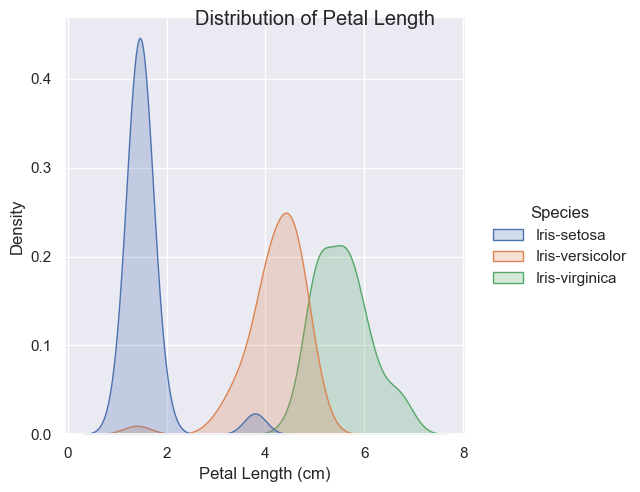

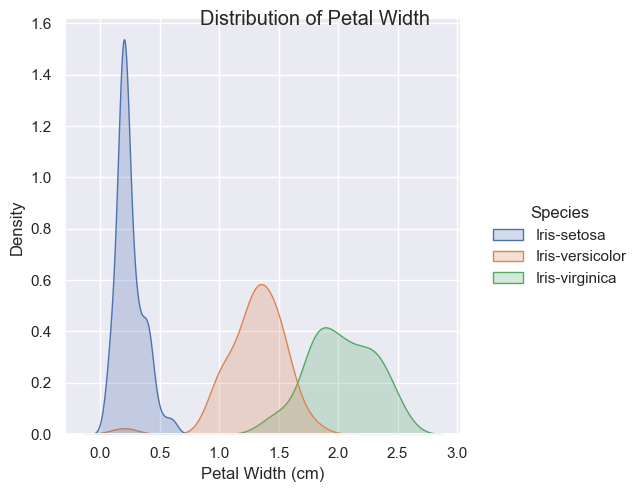

In [113]:
plot = sns.displot(data_csv1, x="SepalLengthCm", hue="Species", kind="kde", fill=True)
plot.fig.suptitle("Distribution of Sepal Length")
plot.set_axis_labels("Sepal Length (cm)", "Density")
plt.show()

plot = sns.displot(data_csv1, x="SepalWidthCm", hue="Species", kind="kde", fill=True)
plot.fig.suptitle("Distribution of Sepal Width")
plot.set_axis_labels("Sepal Width (cm)", "Density")
plt.show()

plot = sns.displot(data_csv1, x="PetalLengthCm", hue="Species", kind="kde", fill=True)
plot.fig.suptitle("Distribution of Petal Length")
plot.set_axis_labels("Petal Length (cm)", "Density")
plt.show()

plot = sns.displot(data_csv1, x="PetalWidthCm", hue="Species", kind="kde", fill=True)
plot.fig.suptitle("Distribution of Petal Width")
plot.set_axis_labels("Petal Width (cm)", "Density")
plt.show()

## Handling Correlation

In [119]:
data_csv2 = data_csv1.select_dtypes(exclude=[object])

In [120]:
data_csv2.shape

(150, 4)

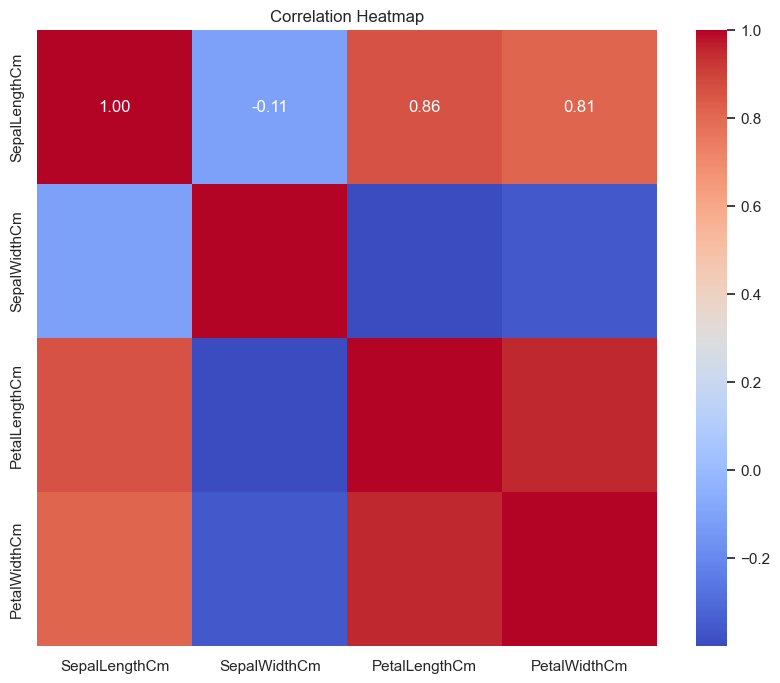

In [122]:
corr_matrix = data_csv2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Box Plots

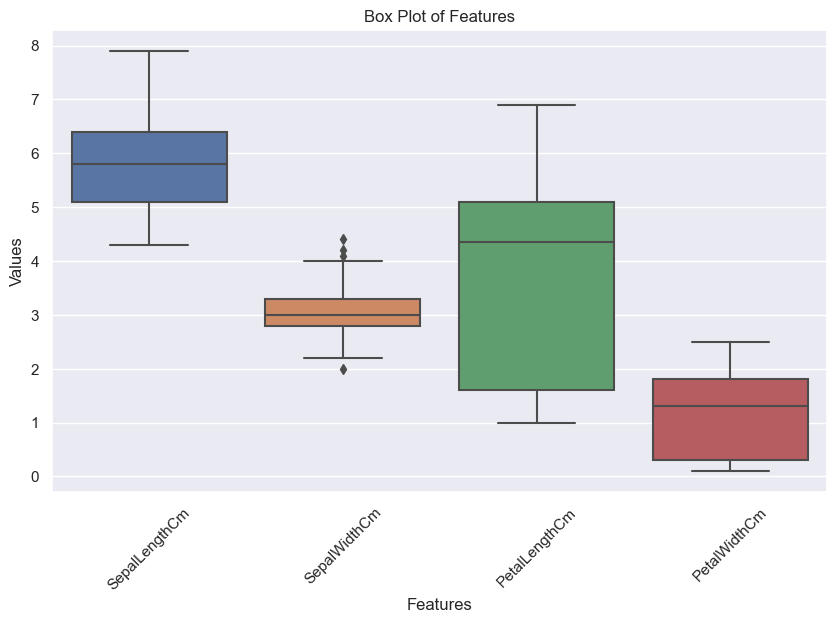

In [123]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_csv1)
plt.title('Box Plot of Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

## Handling outliers

<Axes: xlabel='SepalWidthCm'>

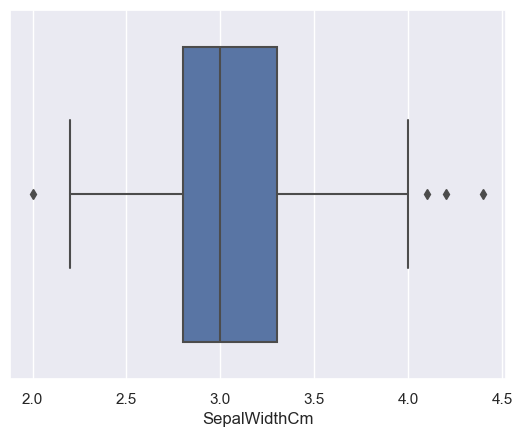

In [125]:
sns.boxplot(x='SepalWidthCm', data=data_csv2)

## removing outliers

In [128]:
Q1 = np.percentile(data_csv2['SepalWidthCm'], 25, interpolation='midpoint')
Q3 = np.percentile(data_csv2['SepalWidthCm'], 75, interpolation='midpoint')
IQR = Q3 - Q1

print("Old Shape:", data_csv2.shape)

Old Shape: (150, 4)


In [132]:
upper = np.where(data_csv2['SepalWidthCm'] >= (Q3 + 1.5 * IQR))
lower = np.where(data_csv2['SepalWidthCm'] <= (Q1 - 1.5 * IQR))

data_csv2.drop(upper[0], inplace=True)
data_csv2.drop(lower[0], inplace=True)

print("New Shape:", data_csv2.shape)

New Shape: (140, 4)


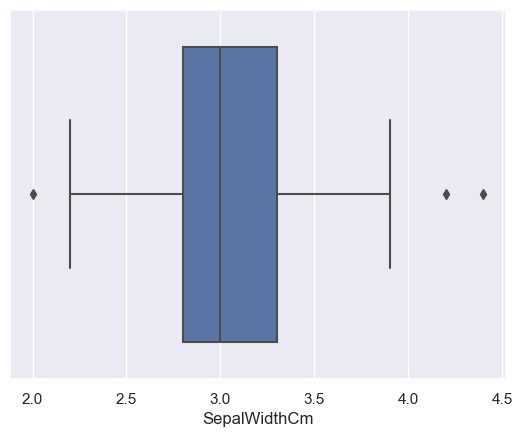

In [130]:
sns.boxplot(x='SepalWidthCm', data=data_csv2)
plt.show()